In [3]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [58]:
shp_dir = '/mnt/Data/shape/Amazon_Basin/Bacia/Amazonas.shp'
amazonas = list(shpreader.Reader(shp_dir).geometries())

andes = list(shpreader.Reader('/mnt/Data/shape/Andes/height/andes_1000.shp').geometries())

In [88]:
data = ca.read_netcdf('/mnt/Data/Data/IMERG/season/summer/IMERG_2000_12_2021_02_24h_05x05_summer.nc',2)
lat = data['lat']
lon = data['lon']
pre = data['pre'].data
pre[pre==np.min(pre)]=0
pre[pre<1]=0

lon2d, lat2d = np.meshgrid(lon, lat)

time : (1895,)
lon : (110,)
lat : (120,)
pre : (1895, 120, 110)


In [89]:
pre_amazonas = ca.extract_shapefile(shp_dir,pre,lat,lon)

Shapes ID len:  1


In [90]:
pre_amazonas_mean = np.nanmean(pre_amazonas,axis=0)

/tmp/ipykernel_76680/1822411745.py:1: RuntimeWarning: Mean of empty slice
  pre_amazonas_mean = np.nanmean(pre_amazonas,axis=0)


/home/arturo/anaconda3/envs/AXE/lib/python3.9/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


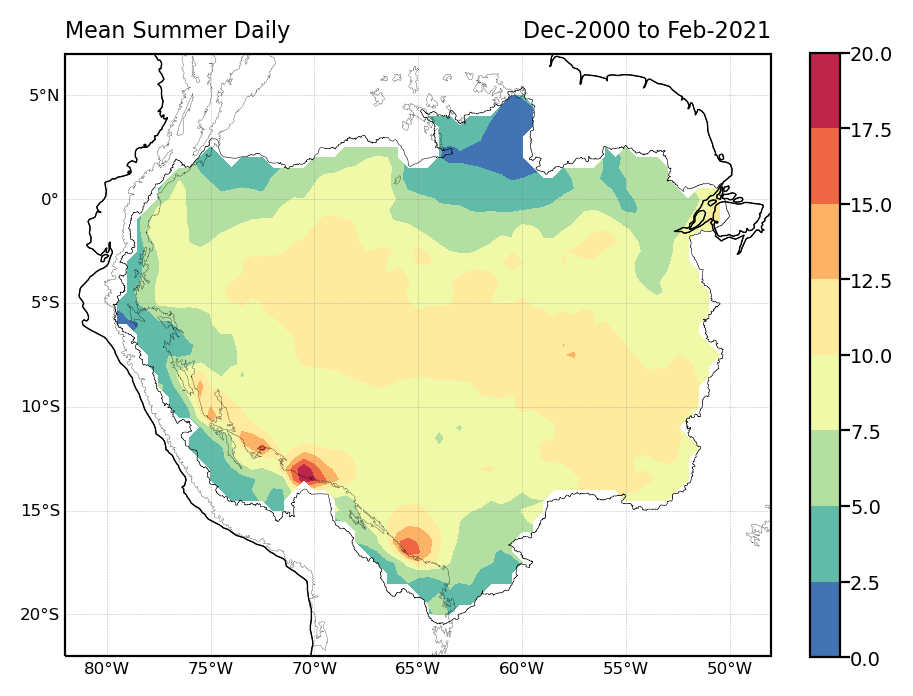

In [91]:
linewidth_shape = 0.2

levels_mean = None
levels_min = None
levels_event = None

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(5,5),dpi=200)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([-82,-48,-22,7],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)

ax1.add_geometries(amazonas,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.1,zorder=5)

a1 = ax1.contourf(lon2d,lat2d,pre_amazonas_mean,cmap=cmap,levels=levels_mean)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

cbar1 = plt.colorbar(a1,fraction=0.039)
cbar1.ax.tick_params(labelsize=7, pad=0.04)

ax1.set_title('Mean Summer Daily',fontsize=8, loc='left')
ax1.set_title('Dec-2000 to Feb-2021',fontsize=8, loc='right')

name_out = '../../images/Amazon_mean_summer_daily.png'
plt.savefig(name_out,transparent = False,bbox_inches ='tight',pad_inches = 0.05, facecolor='white')

In [92]:
ax1.set_extent([-82,-48,-22,7],crs=proj)

In [93]:
lon_bnd = np.where((lon>=-82)&(lon<=-48))[0]
lon2 = lon[lon_bnd]

lat_bnd = np.where((lat>=-22)&(lat<=7))[0]  
lat2 = lat[lat_bnd]

In [94]:
pre_amazonas1 =pre_amazonas[:,lat_bnd,:]
pre_amazonas2 =pre_amazonas1[:,:,lon_bnd]
pre_mean = np.nanmean(pre_amazonas2,axis=0)

/tmp/ipykernel_76680/3005263200.py:3: RuntimeWarning: Mean of empty slice
  pre_mean = np.nanmean(pre_amazonas2,axis=0)


In [95]:
lon2d, lat2d = np.meshgrid(lon2, lat2)

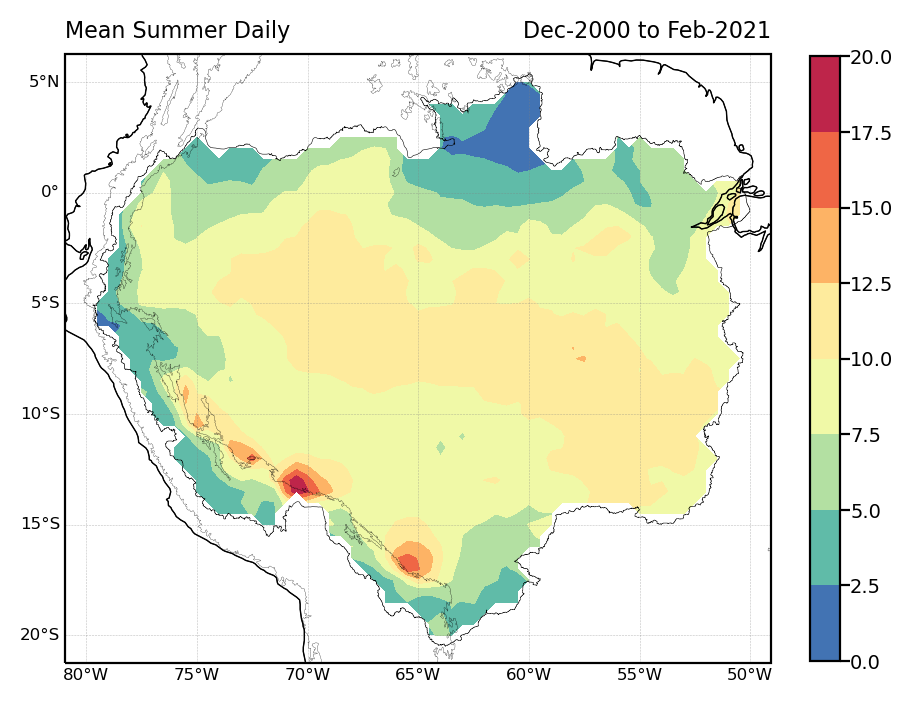

In [96]:
linewidth_shape = 0.2

levels_mean = None
levels_min = None
levels_event = None

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(5,5),dpi=200)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([-82,-48,-22,7],crs=proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)

ax1.add_geometries(amazonas,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=linewidth_shape,zorder=5)
ax1.add_geometries(andes,proj,edgecolor='k',facecolor='None',linestyle='-',linewidth=0.1,zorder=5)

a1 = ax1.contourf(lon2d,lat2d,pre_mean,cmap=cmap,levels=levels_mean)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

cbar1 = plt.colorbar(a1,fraction=0.039)
cbar1.ax.tick_params(labelsize=7, pad=0.04)

ax1.set_title('Mean Summer Daily',fontsize=8, loc='left')
ax1.set_title('Dec-2000 to Feb-2021',fontsize=8, loc='right')

name_out = '../../images/Amazon_mean_summer_daily.png'
plt.savefig(name_out,transparent = False,bbox_inches ='tight',pad_inches = 0.05, facecolor='white')

In [106]:
print(f'Shape data: {pre_amazonas.shape}')
info = {'file': '/mnt/Data/Data/3B42_199901_201212_climatology.nc',
        'title': 'Amazon Basin IMERG Daily Precipitation',
        'year_start':2000,'month_start':12,'day_start':1,'hour_start':0,'minute_start':0,
        'year_end':2006,'month_end':2,'day_end':7,'hour_end':23,'minute_end':59,
        'time_frequency': 'daily',
        'time_interval':1,
        'var_name': 'pre',
        'var_units': 'mm/day'}

Shape data: (1895, 120, 110)


In [107]:
ca.create_netcdf(info,pre_amazonas2,lat2,lon2)

Time Start: 2000-12-01 00:00:00
Time End: 2006-02-07 00:00:00
Time Frequency: daily
Time Lenght: 1895

File created in:  /mnt/Data/Data/3B42_199901_201212_climatology.nc
File title:  Amazon Basin IMERG Daily Precipitation
var title:  pre
var units:  mm/day
